in this project we will work on covid data.we will try to find if a person will survive or not

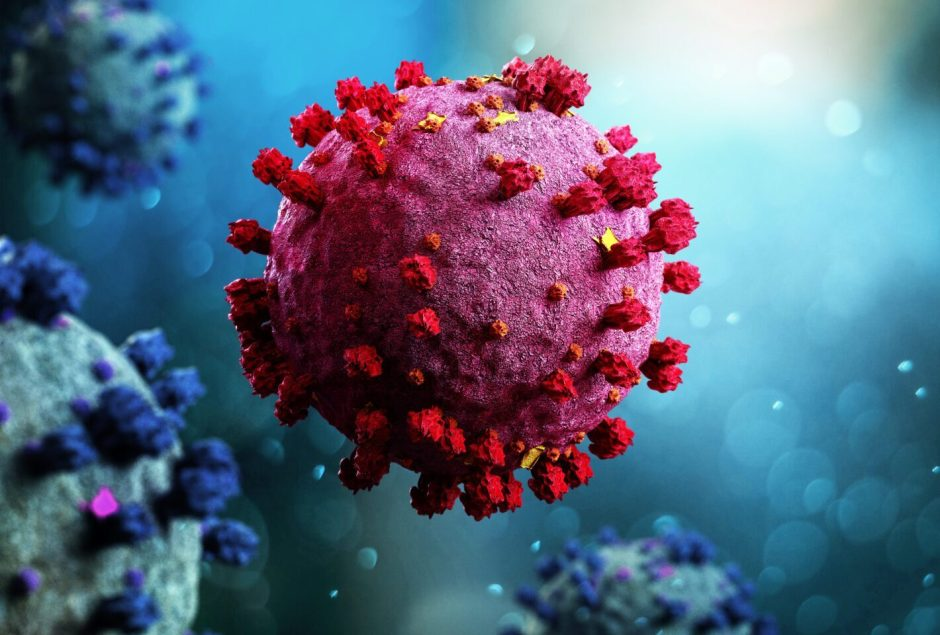

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# df.sample(frac=.2)     for sample from data

In [3]:
import os 
os.listdir()

['.ipynb_checkpoints',
 'COVID DATA Logistic decision random .ipynb',
 'covid19_sample.csv']

In [4]:
df=pd.read_csv('covid19_sample.csv')
df

,Unnamed: 0,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,3517780,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Yes,Missing,Yes,Missing
1,3679793,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,Missing
2,3331587,2020/03/31,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
3,3680266,2020/08/11,2020/08/05,NaN,Laboratory-confirmed case,Female,80+ Years,"Black, Non-Hispanic",Yes,Unknown,Yes,Yes
4,6264234,2020/04/18,NaN,NaN,Probable Case,Female,50 - 59 Years,"Asian, Non-Hispanic",Unknown,Unknown,Yes,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
184150,5626192,2020/09/10,NaN,2020/08/16,Laboratory-confirmed case,Male,10 - 19 Years,"White, Non-Hispanic",No,Missing,No,Missing
184151,4102370,2020/06/26,NaN,2020/06/15,Laboratory-confirmed case,Male,60 - 69 Years,Hispanic/Latino,No,Missing,No,Missing
184152,4832402,2020/08/03,2020/08/04,2020/08/03,Laboratory-confirmed case,Male,50 - 59 Years,"Asian, Non-Hispanic",No,Unknown,No,Unknown
184153,3590011,2020/05/27,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,Unknown,Unknown,Unknown,No,Unknown


In [5]:
df.shape

(184155, 12)

In [6]:
df['Unnamed: 0'].nunique()

184155

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

we will drop `Unnamed: 0` 

In [8]:
df["medcond_yn"].value_counts()

Missing    101496
Yes         42408
Unknown     21830
No          18421
Name: medcond_yn, dtype: int64

In [9]:
df["death_yn"].value_counts(dropna=False)

No     110724
Yes     73431
Name: death_yn, dtype: int64

In [10]:
df.death_yn.isnull().sum()

0

In [11]:
df1=df[df["death_yn"].isin(["Yes", "No"])]

In [12]:
df1.shape

(184155, 11)

In [13]:
df1.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Yes,Missing,Yes,Missing
1,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,Missing
2,2020/03/31,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
3,2020/08/11,2020/08/05,NaN,Laboratory-confirmed case,Female,80+ Years,"Black, Non-Hispanic",Yes,Unknown,Yes,Yes
4,2020/04/18,NaN,NaN,Probable Case,Female,50 - 59 Years,"Asian, Non-Hispanic",Unknown,Unknown,Yes,Unknown


In [14]:
df1.shape

(184155, 11)

In [15]:
df1["icu_yn"].value_counts(dropna=False)

Missing    103731
Unknown     42300
No          27584
Yes         10540
Name: icu_yn, dtype: int64

In [16]:
df1["hosp_yn"].value_counts(dropna=False)

No         91217
Yes        53384
Unknown    20043
Missing    19511
Name: hosp_yn, dtype: int64

In [17]:
df1.isnull().sum()

cdc_report_dt                         0
pos_spec_dt                      117011
onset_dt                          65710
current_status                        0
sex                                   1
age_group                             4
Race and ethnicity (combined)         1
hosp_yn                               0
icu_yn                                0
death_yn                              0
medcond_yn                            0
dtype: int64

In [18]:
df1["Race and ethnicity (combined)"].value_counts(dropna=False)   # first chnge column name
                                                                  # corection index in columns

White, Non-Hispanic                                     75938
Unknown                                                 39585
Hispanic/Latino                                         26330
Black, Non-Hispanic                                     22485
Multiple/Other, Non-Hispanic                             6902
Missing                                                  6789
Asian, Non-Hispanic                                      4581
American Indian/Alaska Native, Non-Hispanic              1100
Native Hawaiian/Other Pacific Islander, Non-Hispanic      444
NaN                                                         1
Name: Race and ethnicity (combined), dtype: int64

In [19]:
df1.rename(columns= { "Race and ethnicity (combined)" : "Race_ethnicity"}, inplace=True)

In [20]:
df1.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race_ethnicity,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,70 - 79 Years,"White, Non-Hispanic",Yes,Missing,Yes,Missing
1,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Yes,Unknown,Yes,Missing
2,2020/03/31,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",Yes,No,Yes,Yes
3,2020/08/11,2020/08/05,NaN,Laboratory-confirmed case,Female,80+ Years,"Black, Non-Hispanic",Yes,Unknown,Yes,Yes
4,2020/04/18,NaN,NaN,Probable Case,Female,50 - 59 Years,"Asian, Non-Hispanic",Unknown,Unknown,Yes,Unknown


In [21]:
df1_final=pd.get_dummies(data=df1, columns=["Race_ethnicity"], drop_first=True)

In [22]:
df1_final.tail()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,"Race_ethnicity_Asian, Non-Hispanic","Race_ethnicity_Black, Non-Hispanic",Race_ethnicity_Hispanic/Latino,Race_ethnicity_Missing,"Race_ethnicity_Multiple/Other, Non-Hispanic","Race_ethnicity_Native Hawaiian/Other Pacific Islander, Non-Hispanic",Race_ethnicity_Unknown,"Race_ethnicity_White, Non-Hispanic"
184150,2020/09/10,NaN,2020/08/16,Laboratory-confirmed case,Male,10 - 19 Years,No,Missing,No,Missing,0,0,0,0,0,0,0,1
184151,2020/06/26,NaN,2020/06/15,Laboratory-confirmed case,Male,60 - 69 Years,No,Missing,No,Missing,0,0,1,0,0,0,0,0
184152,2020/08/03,2020/08/04,2020/08/03,Laboratory-confirmed case,Male,50 - 59 Years,No,Unknown,No,Unknown,1,0,0,0,0,0,0,0
184153,2020/05/27,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,Unknown,Unknown,No,Unknown,0,0,0,0,0,0,1,0
184154,2020/08/14,NaN,2020/07/13,Laboratory-confirmed case,Female,60 - 69 Years,No,Missing,No,Missing,0,1,0,0,0,0,0,0


In [23]:
df1_final.columns=df1_final.columns.str.replace(" ", "_")
df1_final.columns=df1_final.columns.str.replace("-", "_")
df1_final.columns=df1_final.columns.str.replace(",", "_")
df1_final.columns=df1_final.columns.str.replace("/", "_")

In [24]:
df1_final.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn',
       'Race_ethnicity_Asian__Non_Hispanic',
       'Race_ethnicity_Black__Non_Hispanic', 'Race_ethnicity_Hispanic_Latino',
       'Race_ethnicity_Missing', 'Race_ethnicity_Multiple_Other__Non_Hispanic',
       'Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic',
       'Race_ethnicity_Unknown', 'Race_ethnicity_White__Non_Hispanic'],
      dtype='object')

In [25]:
df1_final.head(5)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race_ethnicity_Asian__Non_Hispanic,Race_ethnicity_Black__Non_Hispanic,Race_ethnicity_Hispanic_Latino,Race_ethnicity_Missing,Race_ethnicity_Multiple_Other__Non_Hispanic,Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethnicity_Unknown,Race_ethnicity_White__Non_Hispanic
0,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,70 - 79 Years,Yes,Missing,Yes,Missing,0,0,0,0,0,0,0,1
1,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,80+ Years,Yes,Unknown,Yes,Missing,0,0,0,0,0,0,0,1
2,2020/03/31,NaN,NaN,Laboratory-confirmed case,Male,70 - 79 Years,Yes,No,Yes,Yes,0,0,0,0,0,0,0,1
3,2020/08/11,2020/08/05,NaN,Laboratory-confirmed case,Female,80+ Years,Yes,Unknown,Yes,Yes,0,1,0,0,0,0,0,0
4,2020/04/18,NaN,NaN,Probable Case,Female,50 - 59 Years,Unknown,Unknown,Yes,Unknown,1,0,0,0,0,0,0,0


In [26]:
df1_final["medcond_yn"].value_counts(dropna=False)

Missing    101496
Yes         42408
Unknown     21830
No          18421
Name: medcond_yn, dtype: int64

In [27]:
df1_final["medcond_yn"]=df1_final["medcond_yn"].replace(['Unknown','Missing'],'unknown')


changing medcond_yn 

In [28]:
df1_final["medcond_yn"].value_counts(dropna=False)

unknown    123326
Yes         42408
No          18421
Name: medcond_yn, dtype: int64

In [29]:
df1_final["icu_yn"].value_counts(dropna=False)

Missing    103731
Unknown     42300
No          27584
Yes         10540
Name: icu_yn, dtype: int64

In [30]:
df1_final["icu_yn"]=df1_final["icu_yn"].replace(['Unknown','Missing'],'unknown')


In [31]:
df1_final["icu_yn"].value_counts(dropna=False)

unknown    146031
No          27584
Yes         10540
Name: icu_yn, dtype: int64

In [32]:
df1_final["hosp_yn"].value_counts(dropna=False)

No         91217
Yes        53384
Unknown    20043
Missing    19511
Name: hosp_yn, dtype: int64

In [33]:
df1_final["hosp_yn"]=df1_final["hosp_yn"].replace(['Unknown','Missing'],'unknown')


In [34]:
df1_final["hosp_yn"].value_counts(dropna=False)

No         91217
Yes        53384
unknown    39554
Name: hosp_yn, dtype: int64

In [35]:
df1_final["age_group"].value_counts(dropna=False)

80+ Years        37917
70 - 79 Years    24085
60 - 69 Years    23112
20 - 29 Years    22170
50 - 59 Years    21916
30 - 39 Years    19374
40 - 49 Years    19255
10 - 19 Years    11770
0 - 9 Years       4413
Unknown            139
NaN                  4
Name: age_group, dtype: int64

In [36]:
df1_final["age_group"]=df1_final["age_group"].fillna("others")

In [37]:
df1_final["age_group"].value_counts(dropna=False)

80+ Years        37917
70 - 79 Years    24085
60 - 69 Years    23112
20 - 29 Years    22170
50 - 59 Years    21916
30 - 39 Years    19374
40 - 49 Years    19255
10 - 19 Years    11770
0 - 9 Years       4413
Unknown            139
others               4
Name: age_group, dtype: int64

In [38]:
df1_final["age_group"]=df1_final["age_group"].replace(["0 - 9 Years", "NaN"], "child")
df1_final["age_group"]=df1_final["age_group"].replace(["10 - 19 Years"], "Teens")
df1_final["age_group"]=df1_final["age_group"].replace(["30 - 39 Years", "20 - 29 Years" ], "Adult")
df1_final["age_group"]=df1_final["age_group"].replace(["40 - 49 Years", "50 - 59 Years" ], "Aged")
df1_final["age_group"]=df1_final["age_group"].replace(["60 - 69 Years", "70 - 79 Years", "80+ Years", "Unknown"], "Old")

In [39]:
df1_final["age_group"].value_counts(dropna=False)

Old       85253
Adult     41544
Aged      41171
Teens     11770
child      4413
others        4
Name: age_group, dtype: int64

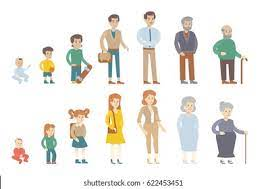

make age group variable into child old adult so it will become east to identify a person


In [40]:
df1_final["sex"].value_counts(dropna=False)

Female     92108
Male       91269
Unknown      537
Missing      238
Other          2
NaN            1
Name: sex, dtype: int64

In [41]:
df1_final["sex"]=df1_final["sex"].replace(["Unknown", "Missing", "Other"], "Others")

In [42]:
df1_final["sex"].value_counts(dropna=True)

Female    92108
Male      91269
Others      777
Name: sex, dtype: int64

In [43]:
df1_final["current_status"].value_counts(dropna=True)

Laboratory-confirmed case    173359
Probable Case                 10796
Name: current_status, dtype: int64

In [44]:
df1_final.head(2)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race_ethnicity_Asian__Non_Hispanic,Race_ethnicity_Black__Non_Hispanic,Race_ethnicity_Hispanic_Latino,Race_ethnicity_Missing,Race_ethnicity_Multiple_Other__Non_Hispanic,Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethnicity_Unknown,Race_ethnicity_White__Non_Hispanic
0,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,Old,Yes,unknown,Yes,unknown,0,0,0,0,0,0,0,1
1,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,Old,Yes,unknown,Yes,unknown,0,0,0,0,0,0,0,1


In [45]:
df1_final['death_yn']=df1_final['death_yn'].map({'Yes':1,'No':0})

mapping target variable

In [46]:
df1_final.head(2)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race_ethnicity_Asian__Non_Hispanic,Race_ethnicity_Black__Non_Hispanic,Race_ethnicity_Hispanic_Latino,Race_ethnicity_Missing,Race_ethnicity_Multiple_Other__Non_Hispanic,Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethnicity_Unknown,Race_ethnicity_White__Non_Hispanic
0,2020/07/22,NaN,NaN,Laboratory-confirmed case,Female,Old,Yes,unknown,1,unknown,0,0,0,0,0,0,0,1
1,2020/08/07,2020/08/04,NaN,Laboratory-confirmed case,Female,Old,Yes,unknown,1,unknown,0,0,0,0,0,0,0,1


In [47]:
df1_final['sex'].value_counts(dropna=False)

Female    92108
Male      91269
Others      777
NaN           1
Name: sex, dtype: int64

In [48]:
df1_final['sex']=df1_final['sex'].replace(["unknown"], "others")

In [49]:
df1_final["sex"]=df1_final["sex"].fillna("Others")

In [50]:
df1_final['sex'].value_counts(dropna=False)

Female    92108
Male      91269
Others      778
Name: sex, dtype: int64

In [51]:
df1_final["pos_spec_dt1"]=pd.to_datetime(df1_final["pos_spec_dt"])

In [52]:
df1_final["pos_spec_dt1"].isnull().sum()

117011

In [53]:
df1_final.drop(columns=["pos_spec_dt1", "pos_spec_dt"], inplace=True)

In [54]:
df1_final.head(2)

,cdc_report_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race_ethnicity_Asian__Non_Hispanic,Race_ethnicity_Black__Non_Hispanic,Race_ethnicity_Hispanic_Latino,Race_ethnicity_Missing,Race_ethnicity_Multiple_Other__Non_Hispanic,Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethnicity_Unknown,Race_ethnicity_White__Non_Hispanic
0,2020/07/22,NaN,Laboratory-confirmed case,Female,Old,Yes,unknown,1,unknown,0,0,0,0,0,0,0,1
1,2020/08/07,NaN,Laboratory-confirmed case,Female,Old,Yes,unknown,1,unknown,0,0,0,0,0,0,0,1


In [55]:
df1_final["cdc_report_dt1"]=pd.to_datetime(df1_final["cdc_report_dt"])

In [56]:
df1_final.drop(columns=["cdc_report_dt"], inplace=True)

In [57]:
df1_final.head(2)

,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race_ethnicity_Asian__Non_Hispanic,Race_ethnicity_Black__Non_Hispanic,Race_ethnicity_Hispanic_Latino,Race_ethnicity_Missing,Race_ethnicity_Multiple_Other__Non_Hispanic,Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethnicity_Unknown,Race_ethnicity_White__Non_Hispanic,cdc_report_dt1
0,NaN,Laboratory-confirmed case,Female,Old,Yes,unknown,1,unknown,0,0,0,0,0,0,0,1,2020-07-22
1,NaN,Laboratory-confirmed case,Female,Old,Yes,unknown,1,unknown,0,0,0,0,0,0,0,1,2020-08-07


In [58]:
df1_final["onset_dt"].isnull().sum()

65710

In [59]:
df1_final.drop(columns=["onset_dt"], inplace=True)

In [60]:
df1_final.head(2)

,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn,Race_ethnicity_Asian__Non_Hispanic,Race_ethnicity_Black__Non_Hispanic,Race_ethnicity_Hispanic_Latino,Race_ethnicity_Missing,Race_ethnicity_Multiple_Other__Non_Hispanic,Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,Race_ethnicity_Unknown,Race_ethnicity_White__Non_Hispanic,cdc_report_dt1
0,Laboratory-confirmed case,Female,Old,Yes,unknown,1,unknown,0,0,0,0,0,0,0,1,2020-07-22
1,Laboratory-confirmed case,Female,Old,Yes,unknown,1,unknown,0,0,0,0,0,0,0,1,2020-08-07


In [61]:
df1_final.isnull().sum()

current_status                                                         0
sex                                                                    0
age_group                                                              0
hosp_yn                                                                0
icu_yn                                                                 0
death_yn                                                               0
medcond_yn                                                             0
Race_ethnicity_Asian__Non_Hispanic                                     0
Race_ethnicity_Black__Non_Hispanic                                     0
Race_ethnicity_Hispanic_Latino                                         0
Race_ethnicity_Missing                                                 0
Race_ethnicity_Multiple_Other__Non_Hispanic                            0
Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic    0
Race_ethnicity_Unknown                             

In [62]:
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184155 entries, 0 to 184154
Data columns (total 16 columns):
 #   Column                                                               Non-Null Count   Dtype         
---  ------                                                               --------------   -----         
 0   current_status                                                       184155 non-null  object        
 1   sex                                                                  184155 non-null  object        
 2   age_group                                                            184155 non-null  object        
 3   hosp_yn                                                              184155 non-null  object        
 4   icu_yn                                                               184155 non-null  object        
 5   death_yn                                                             184155 non-null  int64         
 6   medcond_yn                          

In [63]:
df1_final['quarter']=df1_final['cdc_report_dt1'].dt.quarter   # df['quarter']=df['cdc_report_dt'].dt.to_period('Q')
df1_final['month']=df1_final['cdc_report_dt1'].dt.month
df1_final['day']=df1_final['cdc_report_dt1'].dt.day
df1_final['day_of_week']=df1_final['cdc_report_dt1'].dt.dayofweek


extracting information and making variable from them 

In [64]:
def month_cat(x):
    if x<=10:
        return "starting_of_month"
    elif x>10 and x<=20:
        return "mid_of_month"
    else:
        return "end_of_month"

In [65]:
df1_final["month_ct"]=df1_final["day"].apply(month_cat)

In [66]:
df1_final["month_ct"].value_counts()

mid_of_month         62961
starting_of_month    61577
end_of_month         59617
Name: month_ct, dtype: int64

In [67]:
df1_final['day_of_week'].value_counts()

2    37372
1    29241
0    27831
3    24210
6    22150
4    21904
5    21447
Name: day_of_week, dtype: int64

In [68]:
def day_cat(x):
    if x <= 4:
        return "weekday"
    else:
        return "weekend"

In [69]:
df1_final['day_cat']=df1_final['day_of_week'].apply(lambda a : day_cat(a))

In [70]:
df1_final['day_cat'].value_counts()

weekday    140558
weekend     43597
Name: day_cat, dtype: int64

In [71]:
df1_final.drop(columns=["cdc_report_dt1"], inplace=True)

In [72]:
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184155 entries, 0 to 184154
Data columns (total 21 columns):
 #   Column                                                               Non-Null Count   Dtype 
---  ------                                                               --------------   ----- 
 0   current_status                                                       184155 non-null  object
 1   sex                                                                  184155 non-null  object
 2   age_group                                                            184155 non-null  object
 3   hosp_yn                                                              184155 non-null  object
 4   icu_yn                                                               184155 non-null  object
 5   death_yn                                                             184155 non-null  int64 
 6   medcond_yn                                                           184155 non-null  object
 7   Ra

## Missing value Treatment

In [73]:
df1_final.isnull().sum()

current_status                                                         0
sex                                                                    0
age_group                                                              0
hosp_yn                                                                0
icu_yn                                                                 0
death_yn                                                               0
medcond_yn                                                             0
Race_ethnicity_Asian__Non_Hispanic                                     0
Race_ethnicity_Black__Non_Hispanic                                     0
Race_ethnicity_Hispanic_Latino                                         0
Race_ethnicity_Missing                                                 0
Race_ethnicity_Multiple_Other__Non_Hispanic                            0
Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic    0
Race_ethnicity_Unknown                             

***
* no missing values 
***

### Outliers treatment

In [74]:
df1_final.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
death_yn,184155.0,0.398746,0.489642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Race_ethnicity_Asian__Non_Hispanic,184155.0,0.024876,0.155747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Race_ethnicity_Black__Non_Hispanic,184155.0,0.122098,0.327400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Race_ethnicity_Hispanic_Latino,184155.0,0.142977,0.350051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Race_ethnicity_Missing,184155.0,0.036866,0.188432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Race_ethnicity_Multiple_Other__Non_Hispanic,184155.0,0.037479,0.189934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic,184155.0,0.002411,0.049043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Race_ethnicity_Unknown,184155.0,0.214955,0.410792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Race_ethnicity_White__Non_Hispanic,184155.0,0.412359,0.492260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
quarter,184155.0,2.845505,0.854620,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


***
***
*  No outliers in this data
***
***

## Dummy create

In [75]:
df1_final.dtypes[df1_final.dtypes=='object'].index

Index(['current_status', 'sex', 'age_group', 'hosp_yn', 'icu_yn', 'medcond_yn',
       'month_ct', 'day_cat'],
      dtype='object')

In [76]:
df2=pd.get_dummies(data=df1_final, drop_first=True)

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184155 entries, 0 to 184154
Data columns (total 30 columns):
 #   Column                                                               Non-Null Count   Dtype
---  ------                                                               --------------   -----
 0   death_yn                                                             184155 non-null  int64
 1   Race_ethnicity_Asian__Non_Hispanic                                   184155 non-null  uint8
 2   Race_ethnicity_Black__Non_Hispanic                                   184155 non-null  uint8
 3   Race_ethnicity_Hispanic_Latino                                       184155 non-null  uint8
 4   Race_ethnicity_Missing                                               184155 non-null  uint8
 5   Race_ethnicity_Multiple_Other__Non_Hispanic                          184155 non-null  uint8
 6   Race_ethnicity_Native_Hawaiian_Other_Pacific_Islander__Non_Hispanic  184155 non-null  uint8
 7   Race_ethnic

In [78]:
df2.shape

(184155, 30)

## Model Development

In [79]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
y=df2['death_yn']
x=df2.drop(columns=['death_yn'])

In [81]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.25, random_state=0)

In [82]:
logR=LogisticRegression(max_iter=1000)
logR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [83]:
print('Train Score : ', logR.score(x_train,y_train))
print('Test Score : ', logR.score(x_test,y_test))

Train Score :  0.8861826290943844
Test Score :  0.8864658224548753


In [84]:
pred_train=logR.predict(x_train)
pred_test=logR.predict(x_test)

In [85]:
prob_train=pd.DataFrame(logR.predict_proba(x_train),columns=['prob_0','prob_1'])
prob_train

,prob_0,prob_1
0,0.581282,0.418718
1,0.993789,0.006211
2,0.997900,0.002100
3,0.248712,0.751288
4,0.074466,0.925534
...,...,...
138111,0.994807,0.005193
138112,0.571427,0.428573
138113,0.994249,0.005751
138114,0.776321,0.223679


In [86]:
prob_test=pd.DataFrame(logR.predict_proba(x_test),columns=['prob_0','prob_1'])
prob_test

,prob_0,prob_1
0,0.018064,0.981936
1,0.012825,0.987175
2,0.995168,0.004832
3,0.997897,0.002103
4,0.030233,0.969767
...,...,...
46034,0.995408,0.004592
46035,0.097090,0.902910
46036,0.998393,0.001607
46037,0.964602,0.035398


In [87]:
logR.predict_proba(x_train)

array([[0.58128175, 0.41871825],
       [0.99378876, 0.00621124],
       [0.9978999 , 0.0021001 ],
       ...,
       [0.99424902, 0.00575098],
       [0.77632073, 0.22367927],
       [0.07025714, 0.92974286]])

In [88]:
prob_train_1=logR.predict_proba(x_train)[:, 1]
prob_test_1=logR.predict_proba(x_test)[:, 1]

In [89]:
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    roc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy" : ac1, "Recall" : rc1, "Precision": pc1, "F1_score" : f1 , "Auc": roc1}
    
    fpr, tpr, threshold=metrics.roc_curve(act, probs)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.show()
    return result

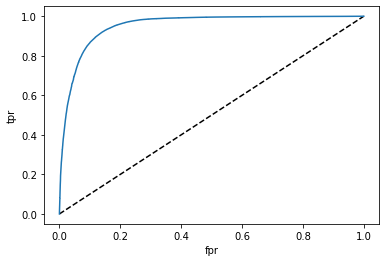

{'Accuracy': 0.8861826290943844,
 'Recall': 0.8634793147736112,
 'Precision': 0.853810792923963,
 'F1_score': 0.8586178364571717,
 'Auc': 0.8824066459785843}

In [90]:
classification_eva(y_train, pred_train, prob_train_1)

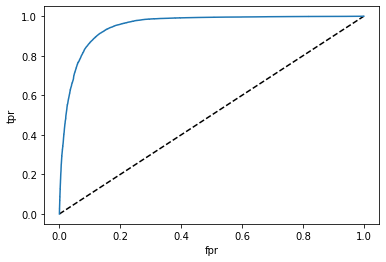

{'Accuracy': 0.8864658224548753,
 'Recall': 0.8623140495867768,
 'Precision': 0.8515697263180804,
 'F1_score': 0.8569082099154096,
 'Auc': 0.8822488531127975}

In [91]:
classification_eva(y_test, pred_test, prob_test_1)

# Decision Tree

In [92]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [93]:
print('Train Accuracy :',(dt.score(x_train,y_train)))
print('Test Accuracy :' ,(dt.score(x_test,y_test)))

Train Accuracy : 0.9359379072663558
Test Accuracy : 0.8712613219227177


In [ ]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=['yes','no']

# setting dpi = 300 to make image clearer than default 
fig, axes=plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi=500)

dt_plot=plot_tree(dt,
                  feature_names = fn,
                  class_names = cn,
                  filled=True);

# random forest and grid search

#### random Forest

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

In [ ]:
print("Train Accuracy :", rf.score(x_train, y_train))
print("Test Accuracy :",  rf.score(x_test ,  y_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'criterion': ['gini','entropy'],
    'max_depth': [5,7,9,10,11],
    'min_samples_split': [10,15,20,50,100,200,250],
    'min_samples_leaf': [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1, verbose=2)

gd_search.fit(x_train, y_train)

In [ ]:
gd_search.best_params_

In [ ]:
gd_search.best_estimator_

In [ ]:
rff=RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=15, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=50, bootstrap=True)